In [1]:
import sys
sys.path.append("../")
import detect_organized as det
import roi
import display
import score
import trim

import cv2
import imutils
import skimage
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

In [2]:
import numpy as np
from shapely.geometry import Polygon

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
im1_name = "../images/trailmix_parent_crop.jpg"
im2_name = "../images/trailmix_child.jpg"

In [5]:
img1 = skimage.io.imread(im1_name)
img1 = imutils.resize(img1, width=500)

img2 = skimage.io.imread(im2_name)
img2 = imutils.resize(img2, width=500)

In [6]:
master_img = img1
search_img = img2

In [7]:
boxes = roi.s_search(img2)

In [8]:
# img1 = skimage.io.imread("../images/screen.jpg")
img1 = cv2.imread(im1_name,0)
img1 = imutils.resize(img1, width=500)

# img2 = skimage.io.imread("../images/find_the_screen.jpg")
img2 = cv2.imread(im2_name,0)
img2 = imutils.resize(img2, width=500)

# feature matching

In [9]:
kp_master, rois = roi.check_roi_good(img1,img2,boxes,"surf", modus="bf", crosscheck=True)

In [10]:
len(boxes)

248

In [11]:
len(rois)

186

# Source/Master image

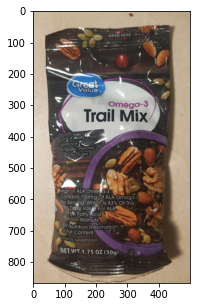

(<matplotlib.image.AxesImage at 0x7fcc64fe89b0>, None)

In [12]:
plt.imshow(master_img),plt.show()

# Search/Child image

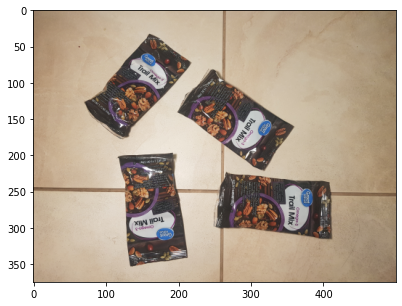

(<matplotlib.image.AxesImage at 0x7fcc642c4ac8>, None)

In [13]:
plt.imshow(search_img),plt.show()

# Selective Search

In [14]:
len(boxes)

248

In [15]:
len(rois)

186

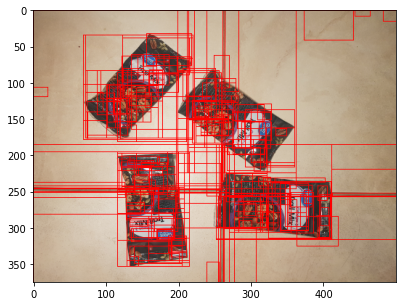

In [16]:
_=display.just_boxes(boxes,search_img)

We get rid of the boxes that have no features

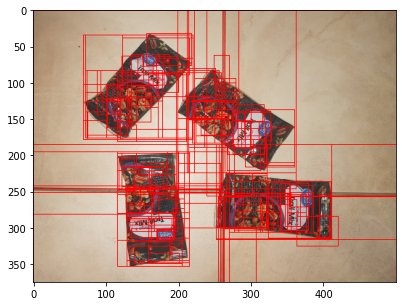

In [17]:
_=display.just_boxes([x[0] for x in rois],search_img)

# Basic cutoff

In [18]:
idxs_basic = score.basic_cutoff(rois, 100)

In [19]:
len(idxs_basic)

15

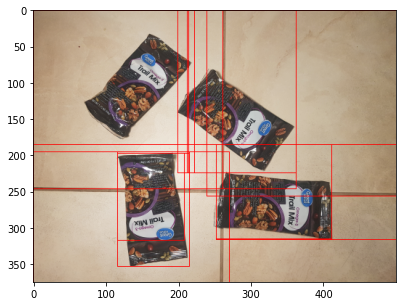

In [20]:
_=display.just_boxes_r(rois, search_img, idxs_basic)

# Homography

In [21]:
rois = trim.idx_trim(rois, idxs_basic)
_ = trim.homography_all(kp_master, master_img, search_img, rois)

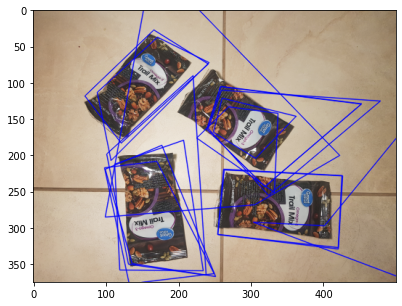

In [22]:
_=display.homography_boxes(rois, search_img)

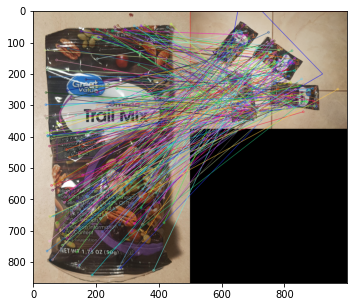

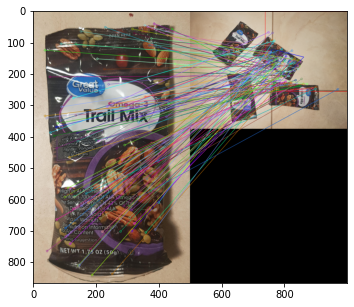

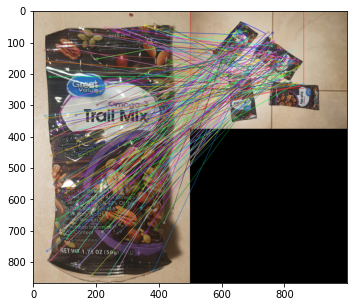

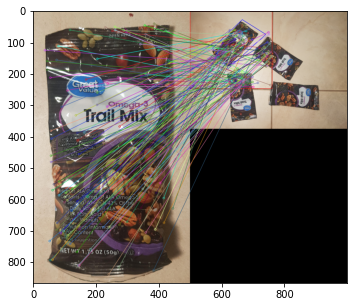

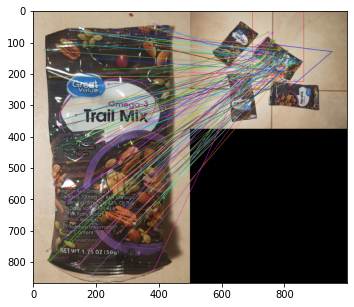

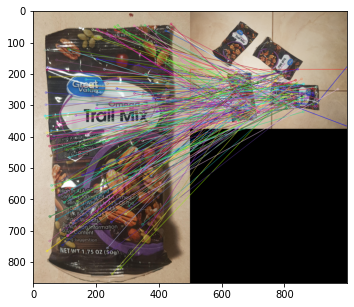

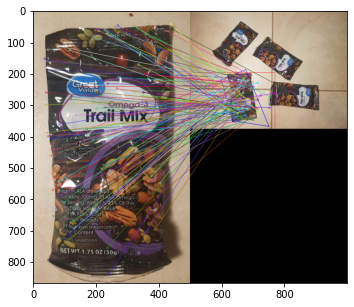

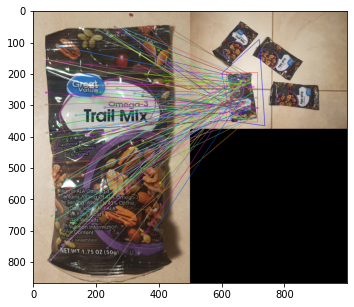

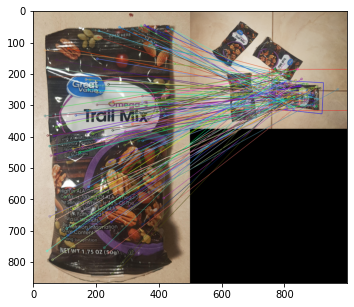

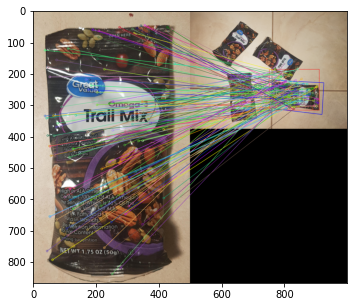

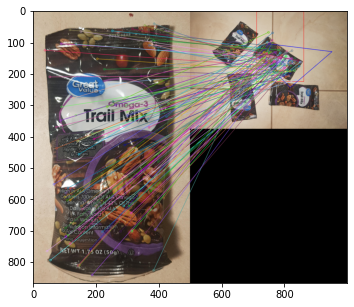

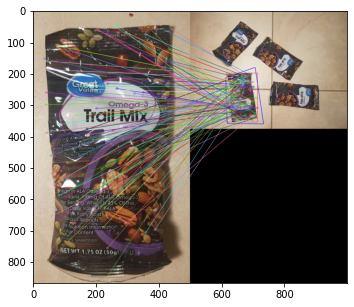

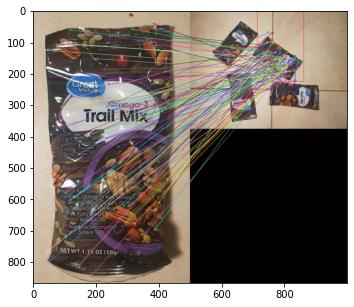

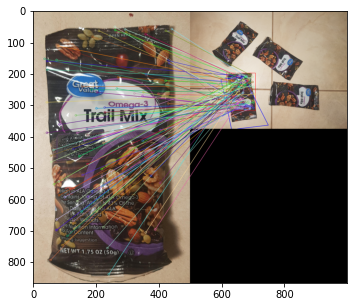

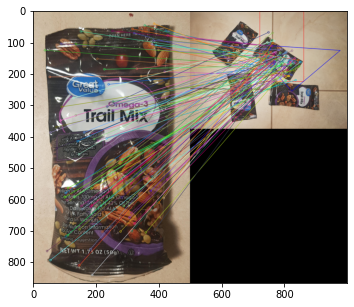

In [23]:
_=display.matchbox(kp_master, master_img, search_img, rois, homography = True)

# Homography Angle Cutoff

In [24]:
idxs_angle = score.angle_cutoff(rois, 35)

In [25]:
rois = trim.idx_trim(rois, idxs_angle)

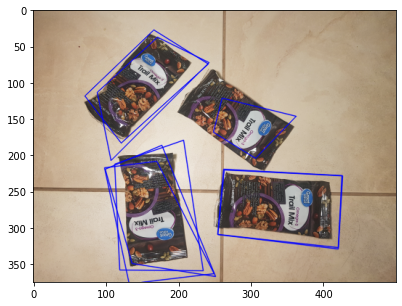

In [26]:
_=display.homography_boxes(rois, search_img)

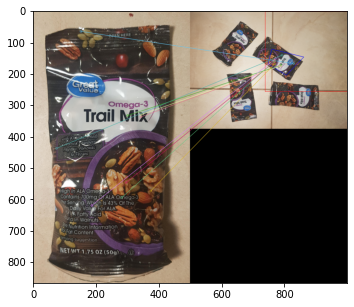

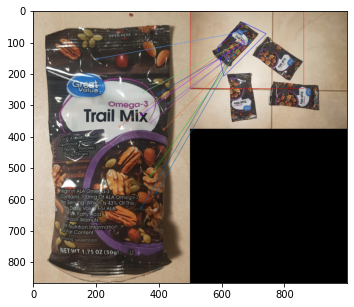

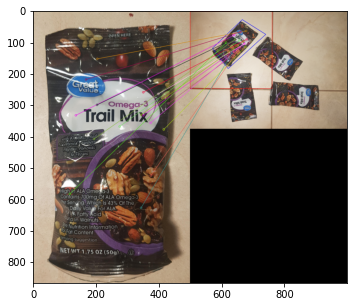

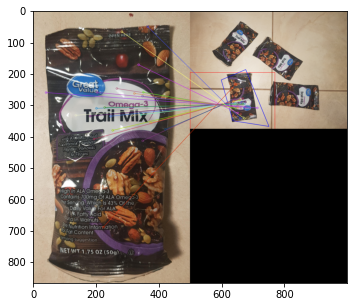

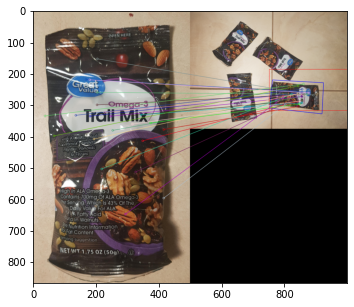

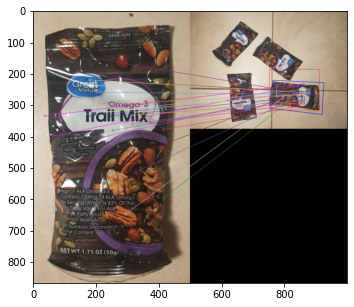

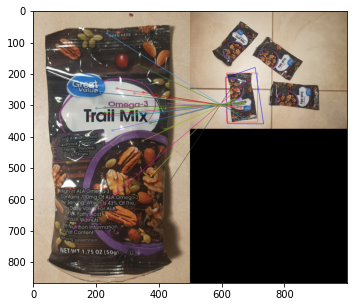

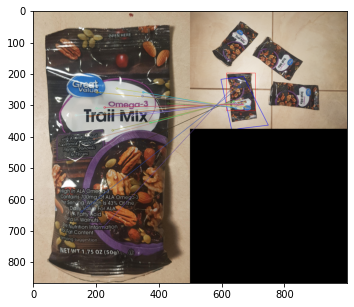

In [27]:
_=display.matchbox(kp_master, master_img, search_img, rois, homography=True, mMask=True)

# NMS

In [28]:
idxs_nms = trim.nms_homography(rois, .50, score._mask_basic_s)

[0 1 2 7 3 5 6 4]


In [29]:
rois = trim.idx_trim(rois, idxs_nms)

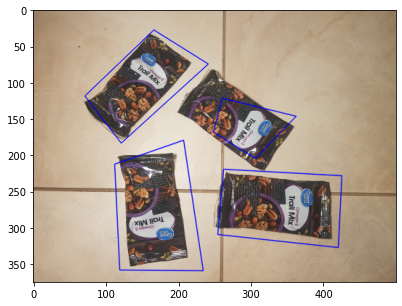

In [30]:
_=display.homography_boxes(rois, search_img)

In [42]:
len (rois)

4

In [31]:
print(img2.shape)

(375, 500)


Testing for one basic square

In [32]:
kp_master1, rois1 = roi.check_roi_good(img1,img2,[(10,10,490,365)]
,"surf")

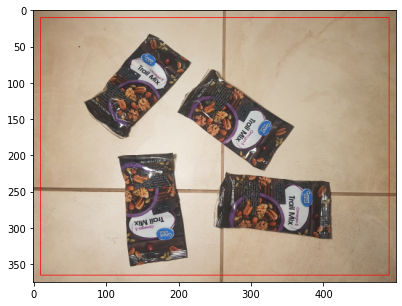

In [33]:
_=display.just_boxes([x[0] for x in rois1],search_img)

In [34]:
idxs1 = score.basic_cutoff(rois1, 10)

In [35]:
rois1 = trim.idx_trim(rois1, idxs1)

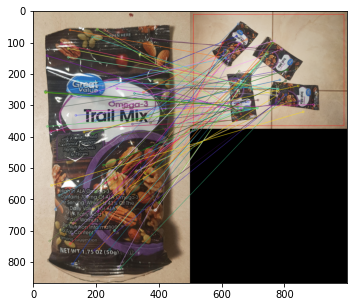

In [36]:
_=display.matchbox(kp_master1, master_img, search_img, rois1)

In [37]:
a={}

In [40]:
a['boi']=4
a['grill']=20

In [41]:
a['grill']

20